# SA51 Team 4 Python Machine Learning CA - Part 1
# Problem Statement

Done by: Liau Han Yang, Jonathan, Su Luping, Huang Jia Wei, Rukaya Afrin, Lim Tzu Tai, Thar Thet Aung, Xu Zhenli, Lim Yu De Justin

Wines are produced across various regions and appreciated by people all over the world.

Data on the attributes that may possibly shape the taste character of red wine has been collected. Wine experts were recruited to grade the wine quality of each sample between 0 (very bad) and 10 (very excellent) and the median of at least 3 evaluations made by experts for each sample is also included in the dataset.

The objective of this report is to investigate:

(a) The relationships between wine attributes and the quality, which is a representation of consumer preferences; and 
(b) the viability of classifying red wine into the different quality grades based these attributes.

The aim is to explore whether consumer preferences can be transformed into measurable indicators that may be used during the wine production process.

# Introduction 
## Models

The following classification models will be explored, along with data engineering and feature engineering in the second half of the report. 

1.Logistic Regression (LogReg) Model

2.K-Nearest Neighbours (K-NN) Model

3.Decision Tree (DT) Model

## Dataset 

The source of the original dataset is from: https://www.kaggle.com/danielpanizzo/wine-quality. Only the dataset for red wine consisting of 1599 samples is used for the purposes of this report.

## Independent Variables

The independent variables of red wine in relation to its quality will be explored. These variables are:

1 - fixed acidity (tartaric acid - g / dm^3) - most acids involved with wine or fixed or nonvolatile  

2 - volatile acidity (acetic acid - g / dm^3) - the amount of acetic acid in wine, which at too high of levels can lead to an       unpleasant, vinegar taste 

3 - citric acid (g / dm^3) - found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar (g / dm^3) - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1     gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides (sodium chloride - g / dm^3) - the amount of salt in the wine

6 - free sulfur dioxide (mg / dm^3) - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and     bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide (mg / dm^3) - ,the amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable     in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density (g / cm^3) - the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4     on the pH scale

10 - sulphates (potassium sulphate - g / dm3) - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich        acts as an antimicrobial and antioxidant

11 - alcohol (% by volume) - the percent alcohol content of the wine

## Dependent Variable

The dependent variable will stand as:

1 - quality (score between 0 and 10) - based on sensory data; median of at least 3 evaluations made by wine experts (Note: only grades of 3 to 8 are present in the dataset as the results of rating only fall within that range) 

# Import all Required Libraries

In [1]:
# Import the modules required to process this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import graphviz
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from graphviz import Source
from collections import Counter
import imblearn

# Import Dataset

In [2]:
# Read the csv data file
df = pd.read_csv("data/wine quality - red.csv")
# Show the independent and dependent variables in table form
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Data Processing


In [3]:
# First, we print the shape of the data file in (rows,columns)
print(df.shape)

(1599, 12)


In [4]:
# Using the inplace = True command, we compare and observe that the shape remains the same as before.
# Hence, there are no null values
df.dropna(inplace = True)
print(df.shape)

(1599, 12)


# Splitting into Training and Test Sets

In [5]:
# Read the features without target
x = df.iloc[:,:-1] 
# Read the last column,'quality' as the target
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, stratify = y)
# stratify = y is used to ensure the proportion of all classes are the same in both training and test sets

x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
51,6.6,0.520,0.04,2.2,0.069,8.0,15.0,0.99560,3.40,0.63,9.4
987,7.1,0.360,0.30,1.6,0.080,35.0,70.0,0.99693,3.44,0.50,9.4
1278,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5
208,7.8,0.440,0.28,2.7,0.100,18.0,95.0,0.99660,3.22,0.67,9.4
944,8.3,0.300,0.49,3.8,0.090,11.0,24.0,0.99498,3.27,0.64,12.1




# Model Training and Prediction prior to Data and Feature Engineering

## Logistic Regression (Accuracy: 0.625)

### Model Training

In [6]:
# Fit the model to the training set

logReg = LogisticRegression (solver = 'lbfgs', multi_class = 'auto', random_state = 0, max_iter = 8000) 
# The maximum number of iterations has been raised as the default 100 iterations is insufficient 
# for model to converge given the multiple classes and features

start_time = time.time()
logReg.fit(x_train, y_train)
end_time = time.time()
time_taken = end_time - start_time
print('For Logistic Regression, training the model takes %s seconds.'%time_taken)

For Logistic Regression, training the model takes 3.329700231552124 seconds.


### Model Validation

In [7]:
# Validate the model using the test dataset
# Calculate the duration for prediction and the accuracy of the model
start_time = time.time()
y_pred = logReg.predict(x_test)
end_time = time.time() 
time_taken = end_time - start_time
print('For Logistic Regression, prediction takes %s seconds.' %time_taken)
print('For Logistic Regression, accuracy score: %s.' %accuracy_score(y_test, y_pred))

For Logistic Regression, prediction takes 0.0019948482513427734 seconds.
For Logistic Regression, accuracy score: 0.625.


### Confusion Matrix

In [8]:
# Display the model's confusion matrix
confusion_matrix (y_test, y_pred)

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   8,   5,   0,   0],
       [  0,   0, 126,  41,   3,   0],
       [  0,   0,  46, 110,   4,   0],
       [  0,   0,   2,  34,  14,   0],
       [  0,   0,   0,   3,   2,   0]], dtype=int64)

## K-NN Classification (Accuracy: 0.515)

### Model Training

In [9]:
# Set the various k values in an array
k_array=np.arange(3,21,2) 
k_array

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19])

In [10]:
# Finding k with the highest accuracy for values in k_array

k_max = 0
ac_max = 0

for k in k_array:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    accuracy = accuracy_score(y_test, knn.predict(x_test))
    if (accuracy > ac_max):
        k_max = k
        ac_max = accuracy
    print("k =", k, "and accuracy =", accuracy)
print("----------")
print("The number of neighbours with the best accuracy for K-NN is", k_max, "of accuracy", ac_max)

k = 3 and accuracy = 0.455
k = 5 and accuracy = 0.4625
k = 7 and accuracy = 0.4575
k = 9 and accuracy = 0.4375
k = 11 and accuracy = 0.48
k = 13 and accuracy = 0.4575
k = 15 and accuracy = 0.4925
k = 17 and accuracy = 0.485
k = 19 and accuracy = 0.515
----------
The number of neighbours with the best accuracy for K-NN is 19 of accuracy 0.515


k = 1 is excluded to avoid overfitting. k = 19 has the highest accuracy for odd numbers between 3 (inclusive) and 20. We have only considered odd numbers between 3 (inclusive) and 20 as the computational load increases exponentially as k increases.

In [11]:
# Model K-NN with k = 19 neighbours
knn_1 = KNeighborsClassifier(n_neighbors=k_max)

start_time = time.time()
knn_1.fit(x_train,y_train)
end_time = time.time()
time_taken = end_time - start_time

print("For K-NN, training the model takes %s seconds." %time_taken)

For K-NN, training the model takes 0.0030214786529541016 seconds.


### Model Validation

In [12]:
# Validate the model using the test dataset
# Calculate the duration for prediction and the accuracy of the model
start_time = time.time()
y_pred = knn_1.predict(x_test)
end_time = time.time()
time_taken = end_time - start_time
accuracy = accuracy_score(y_test, y_pred)

print("For K-NN, prediction takes %s seconds." %time_taken)
print("For K-NN, accuracy score: %s" %accuracy)

For K-NN, prediction takes 0.0239717960357666 seconds.
For K-NN, accuracy score: 0.515


### Confusion Matrix

In [13]:
# Display the model's confusion matrix
confusion_matrix(y_test, y_pred)

array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,   9,   4,   0,   0],
       [  0,   0, 119,  50,   1,   0],
       [  0,   0,  78,  78,   4,   0],
       [  0,   0,  17,  24,   9,   0],
       [  0,   0,   2,   2,   1,   0]], dtype=int64)

## Decision Tree (Accuracy: 0.6275)

### Model Training

In [14]:
# Fit the model to the training set
dt = DecisionTreeClassifier(random_state = 0)

start_time = time.time()
dt.fit(x_train, y_train)
end_time = time.time()
time_taken = end_time - start_time

print("For Decision Tree, training the model takes %s seconds" %time_taken)

For Decision Tree, training the model takes 0.01296377182006836 seconds


### Model Validation 

In [15]:
# Validate the model using the test dataset
# Calculate the duration for prediction and the accuracy of the model
start_time = time.time()
y_pred = dt.predict(x_test)
end_time = time.time()
time_taken = end_time - start_time
accuracy = accuracy_score(y_test, y_pred)
print("For Decision Tree, prediction takes %s seconds." %time_taken)
print("For Decision Tree, accuracy score: %s" %accuracy)

For Decision Tree, prediction takes 0.0020308494567871094 seconds.
For Decision Tree, accuracy score: 0.6275


### Confusion Matrix

In [16]:
# Display the model's confusion matrix
confusion_matrix(y_test, y_pred)

array([[  0,   1,   0,   1,   0,   0],
       [  1,   0,   2,   9,   1,   0],
       [  2,   7, 123,  34,   3,   1],
       [  0,   0,  35,  99,  22,   4],
       [  0,   0,   1,  19,  29,   1],
       [  0,   0,   1,   1,   3,   0]], dtype=int64)

### Visualising the Decision Tree Model

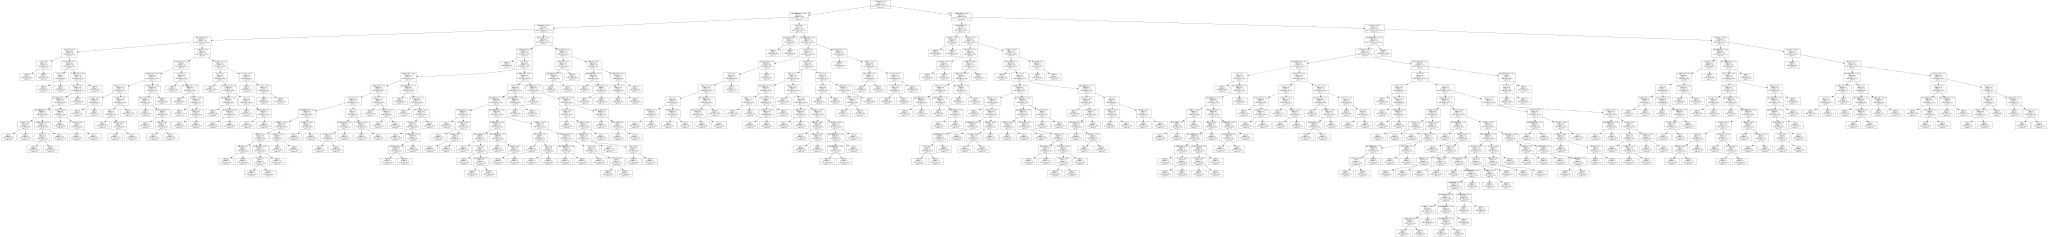

In [17]:
# Display the tree, with no output file

Source(tree.export_graphviz(dt, out_file=None, class_names=["3", "4", "5", "6", "7", "8"], 
                            feature_names= x_train.columns))

# Data Engineering - Dealing with Imbalanced Dataset

In this section, we will explore how data engineering via data sampling could possibly lessen the bias caused by an imbalanced dataset. 

Counter({5: 511, 6: 478, 7: 149, 4: 40, 8: 13, 3: 8})


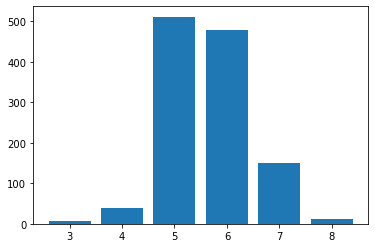

In [18]:
counter = Counter(y_train)
print(counter)
plt.bar(counter.keys(), counter.values())
plt.show()

As seen in the above chart on the distribution of classes, the original dataset and thus training set is imbalanced. Though this reflects reality where there are less occurrences of wine with poor quality (of grades 3 or 4) or wine of good quality (of grades 7 or 8), the unequal distribution may affect the accuracy of our classification models, in which the models are biased towards the classes with a higher number of samples. 

In [19]:
logReg.fit(x_train, y_train)
y_pred = logReg.predict(x_test)
print(confusion_matrix(y_test, y_pred, labels=[3,4,5,6,7,8]))

[[  0   0   2   0   0   0]
 [  0   0   8   5   0   0]
 [  0   0 126  41   3   0]
 [  0   0  46 110   4   0]
 [  0   0   2  34  14   0]
 [  0   0   0   3   2   0]]


For example, when we look at the confusion matrix of the logistic regression model built earlier, the model predicted none of the minority classes (grades 3, 4 or 8) despite there being such samples in the test set. Instead, the model predicts quality as mostly 5 or 6 when actual grade is 3, 4, or 8 (e.g. 2 samples of grade 3 were predicted as quality 5). This suggests that there may be some bias present in our models.

As we are interested in not just wine of grades 5 or 6 but across the entire scale, we would like our models to be able to predict the minority classes as well. 

In dealing with an imbalanced dataset, different data sampling techniques can be employed. 

### Undersampling 
Firstly, we attempt to undersample the majority classes in our training dataset, i.e. reduce the number of samples or observations from the majority classes, using the RandomUnderSampler from imblearn library.

Counter({5: 100, 6: 100, 7: 100, 4: 40, 8: 13, 3: 8})


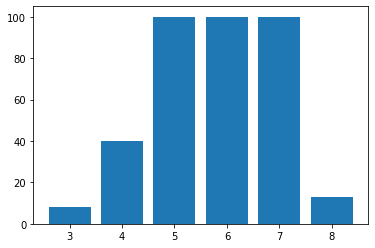

In [20]:
from imblearn.under_sampling import RandomUnderSampler

# using a dict to define the no. of samples for each class
# reduce the no. of samples for quality 5, 6 and 7 to 100
under_strategy = {3:8, 4:40, 5:100, 6:100, 7:100, 8:13}
under = RandomUnderSampler(sampling_strategy=under_strategy, random_state=0)
x_train_resampled, y_train_resampled = under.fit_resample(x_train, y_train)

# check distribution of classes after undersampling
counter = Counter(y_train_resampled)
print(counter)
plt.bar(counter.keys(), counter.values())
plt.show()

In [21]:
# check accuracy score and confusion matrix of LogReg model after undersampling

logReg.fit(x_train_resampled, y_train_resampled)
y_pred = logReg.predict(x_test)
print('For Logistic Regression, accuracy score: %s' %accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

For Logistic Regression, accuracy score: 0.5425
[[  0   1   1   0   0   0]
 [  0   3   5   3   2   0]
 [  0   5 116  35  14   0]
 [  0   2  44  59  55   0]
 [  0   0   1  10  39   0]
 [  0   0   0   1   4   0]]


Using logistic regression as an example, we notice from the confusion matrix that after undersampling the majority classes, the model is able to better predict the minority classes -- predicting correctly 3 samples of grade 4 (previously 0) and 39 samples of grade 7 (previously 14). However, accuracy score has fallen from 0.625 to 0.5475 as the number of incorrect predictions for the majority classes has increased. This suggests a tradeoff, in which heavily undersampling the majority classes have resulted in information loss.

### Oversampling 
Next, we attempt to oversample the minority classes in our training dataset instead, i.e. increase the number of samples or observations from the minority classes. The Synthetic Minority Oversampling Technique (SMOTE) is used to synthesize new samples from existing data.

Counter({5: 511, 6: 478, 7: 180, 4: 120, 8: 40, 3: 30})


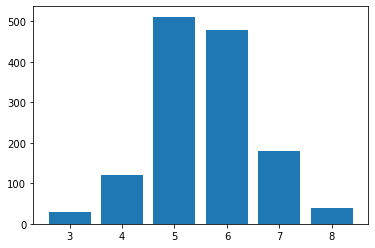

In [22]:
from imblearn.over_sampling import SMOTE

# using a dict to define the no. of samples for each class
# increase the no. of samples for quality 3, 4, 7 and 8
over_strategy = {3:30, 4:120, 5:511, 6:478, 7:180, 8:40}
over = SMOTE(sampling_strategy=over_strategy, random_state=0, k_neighbors=3)
x_train_resampled, y_train_resampled = over.fit_resample(x_train, y_train)

# check distribution of classes after oversampling
counter = Counter(y_train_resampled)
print(counter)
plt.bar(counter.keys(), counter.values())
plt.show()

In [23]:
# check accuracy score and confusion matrix of LogReg model after oversampling

logReg.fit(x_train_resampled, y_train_resampled)
y_pred = logReg.predict(x_test)
print('For Logistic Regression, accuracy score: %s' %accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

For Logistic Regression, accuracy score: 0.625
[[  1   0   1   0   0   0]
 [  0   4   5   3   1   0]
 [  0   4 123  40   3   0]
 [  0   0  48 102  10   0]
 [  0   0   2  29  19   0]
 [  0   0   0   2   2   1]]


Again, using logistic regression as an example, we notice from the confusion matrix that after oversampling the majority classes, the model is able to better predict the minority classes. Accuracy for the model remained at 0.625, and further experimentation with the sampling strategy (no. of samples for minority classes after oversampling) did not boost accuracy as well.  

### Combining Undersampling and Oversampling
Next, we attempt to combine undersampling and oversampling techniques to evaluate the impact of data sampling on the models. 

Counter({5: 420, 6: 400, 7: 160, 4: 70, 8: 40, 3: 30})


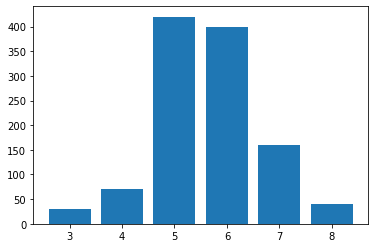

In [24]:
# RandomOverSampler and BorderlineSMOTE, a variation of SMOTE intended for oversampling of multi-class datasets 
# were also looked at.

from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE

over_strategy = {3:30, 4:70, 5:511, 6:478, 7:160, 8:40}
under_strategy = {3:30, 4:70, 5:420, 6:400, 7:160, 8:40}
over = BorderlineSMOTE(sampling_strategy=over_strategy, random_state=0, k_neighbors=3)
under = RandomUnderSampler(sampling_strategy=under_strategy, random_state=0)
# over = RandomOverSampler(sampling_strategy=over_strategy,random_state=0)

pipeline = Pipeline(steps=[('o', over), ('u', under)])

x_train_resampled, y_train_resampled = pipeline.fit_resample(x_train, y_train)

counter = Counter(y_train_resampled)
print(counter)
plt.bar(counter.keys(), counter.values())
plt.show()

#### Logistic Regression Using Resampled Data

In [25]:
# check accuracy score and confusion matrix of LogReg model based on resampled data
logReg.fit(x_train_resampled, y_train_resampled)
y_pred = logReg.predict(x_test)
print('For Logistic Regression, accuracy score: %s' %accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

For Logistic Regression, accuracy score: 0.595
[[  1   0   1   0   0   0]
 [  1   0   7   4   1   0]
 [  2   2 124  39   3   0]
 [  3   0  47  92  16   2]
 [  1   0   1  24  21   3]
 [  0   0   0   3   2   0]]


#### K-NN Classification Using Resampled Data

In [26]:
# check accuracy score and confusion matrix of K-NN model based on resampled data

# Finding k with the highest accuracy for values in k_array
k_max = 0
ac_max = 0
for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors=k)
    knn_ex.fit(x_train_resampled,y_train_resampled)
    ac = accuracy_score(y_test,knn_ex.predict(x_test))
    if (ac > ac_max):
        k_max = k
        ac_max = ac
    print("K =", k, "and accuracy =", ac)
print("----------")
print("The number of neighbours with the best accuracy for K-NN is", k_max, "of accuracy", ac_max)

# Model K-NN with k that has best accuracy 
knn_1 = KNeighborsClassifier(n_neighbors=k_max)
knn_1.fit(x_train_resampled,y_train_resampled)
y_pred = knn_ex.predict(x_test)
print("----------")
print('For K-NN, accuracy score: %s' %accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

K = 3 and accuracy = 0.415
K = 5 and accuracy = 0.4375
K = 7 and accuracy = 0.43
K = 9 and accuracy = 0.4175
K = 11 and accuracy = 0.445
K = 13 and accuracy = 0.46
K = 15 and accuracy = 0.4675
K = 17 and accuracy = 0.47
K = 19 and accuracy = 0.485
----------
The number of neighbours with the best accuracy for K-NN is 19 of accuracy 0.485
----------
For K-NN, accuracy score: 0.485
[[  0   1   1   0   0   0]
 [  1   1   7   4   0   0]
 [  2   5 111  47   4   1]
 [  0   2  68  71  14   5]
 [  0   2  15  17  10   6]
 [  0   1   1   1   1   1]]


#### Decision Tree Using Resampled Data

In [27]:
dt.fit(x_train_resampled, y_train_resampled)
y_pred = dt.predict(x_test)
print('For Decision Tree, accuracy score: %s' %accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

For Decision Tree, accuracy score: 0.6275
[[  0   1   0   1   0   0]
 [  0   3   4   4   2   0]
 [  3   5 125  32   5   0]
 [  0   0  42  97  19   2]
 [  0   3   3  17  25   2]
 [  0   0   1   1   2   1]]


Using a combination of oversampling and undersampling techniques have enabled the models to predict minority classes better, but generally, accuracy of the models fell (LogReg: from 0.625 to 0.595, K-NN: from 0.515 to 0.485, DT: maintained at 0.6275) due to other factors such as information loss for the majority classes. It is noted however, that the decision tree model receives greater benefits from data sampling out of the three classification models used, as the tradeoff in accuracy for better predictions for minority classes is less significant. 

### Impact of Data Engineering (Data Sampling)
Despite the attempts to resample the dataset using various techniques, accuracy scores of the models have not improved although the models are able to better predict the minority classes. Often, the models predict the majority classes worse after resampling. It is likely that a combination of factors, including enormous data imbalance, extremely low availablity of samples for minority classes and poor correlation between the dependent variables and independent variable have limited the learning of the classification models. Attempts to remove the bias resulting from imbalanced dataset have resulted in tradeoffs such as information loss instead. More data, especially for the minority classes are required for the models to learn better and give better predictions for all classes. 

# Feature Engineering - Feature Selection

In this section, we look into feature engineering. More specifically, we will use feature selection to reduce the number of features to be used for training our classification models. The curse of dimensionality becomes more apparent with each additional feature or dimension in the dataset. It results in high data sparsity and may unnecessarily increase storage space and processing time for a modelling algorithm. As such, we only want to keep independent variables that are sufficiently correlated with the dependent variable and also make sure that the independent variables in the model are not strongly correlated with each other.

## Correlation Matrix

First, we look at the correlation matrix of the original dataset.

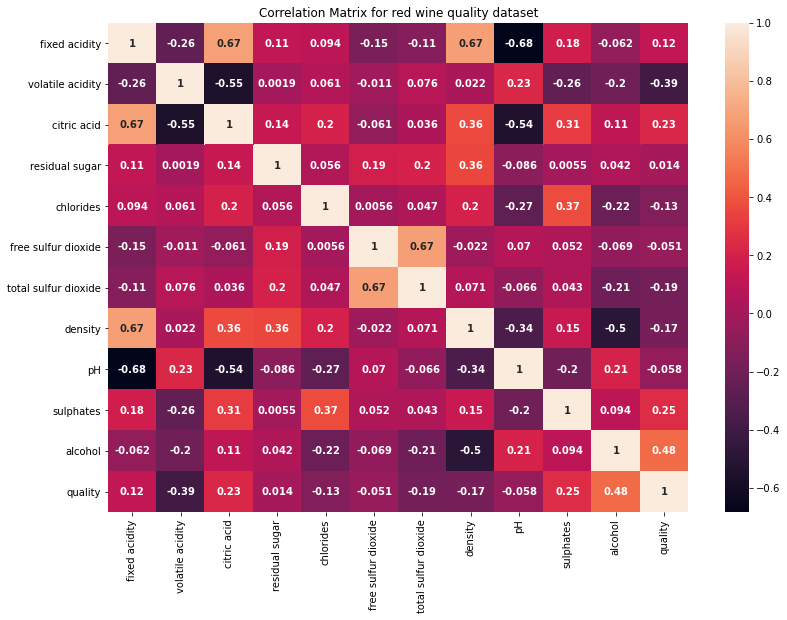

In [28]:
corr_mat = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(13,9))
ax = sns.heatmap(data=corr_mat, annot=True, annot_kws={"weight": "bold"})
plt.title("Correlation Matrix for red wine quality dataset")
plt.show()

## Filter candiate features by checking their correlation with respect to the dependent variable

Our potential candidates for features in our model are features that have an absolute value of correlation > 0.3 with respect to the dependent variable, quality. We will now take a look at these candidates.

In [29]:
# Focus on column of the corr matrix that shows correlation with respect to the dependent variable
target_label = "quality"
target_column = corr_mat[target_label]

# Drop the row of the target_column which shows the correlation of the dep variable with respect to itself
target_column.drop([target_label], inplace=True)

# Define lower bound of the correlation of indep variable with respect to the dependent variable
corr_y_lower_bound = 0.3

# Filter candidate features using the defined lower bound
candidate_features = target_column[abs(target_column) > corr_y_lower_bound]
print("Features that have |corr| > %s with %s:\n%s\n" % (corr_y_lower_bound, target_label, candidate_features))

Features that have |corr| > 0.3 with quality:
volatile acidity   -0.390558
alcohol             0.476166
Name: quality, dtype: float64



## Filter candidate features by checking their correlation with respect to each other

After filtering out the potential candidates using the lower bound of 0.3, we are left with 2 candidates, namely, volatile acidity and alcohol. Now, we check if these features are strongly correlated with each other. If they are, we keep the feature which has the highest correlation with the dependent variable, quality, and remove the others.

In [30]:
labels_to_drop = list(set(corr_mat.index) - set(candidate_features.index))

# Drop columns and indexes that are not candidate features
new_corr_mat = corr_mat.drop(index=labels_to_drop, columns=labels_to_drop)

print("%s\n" % new_corr_mat)

skip = []
selected = []

print("%s\n" % list(new_corr_mat.columns))

# Define lower bound of the correlation of dep variable with respect to dependent variable
corr_x_lower_bound = 0.3
counter = 1

for col in list(new_corr_mat.columns):
    if not (col in skip or col in selected):
        print("---------------------Pass %s---------------------\n" % counter)
        
        # Find the features / x which are highly correlated to each other
        temp = new_corr_mat[col]
        temp = temp[abs(temp) > corr_x_lower_bound]
        print("Features that have |corr| > %s with %s:\n%s\n" % (corr_x_lower_bound, col, temp))
        
        # Select one from amongst them that has the highest correlation to y as their representative
        corr_wrt_y_for_strongly_corr_features = candidate_features[temp.index]
        print("Correlation with respect to y for features that have |corr| > %s with %s:\n%s\n" %
              (corr_x_lower_bound, col, corr_wrt_y_for_strongly_corr_features))
        max_corr_with_y_feature = corr_wrt_y_for_strongly_corr_features.abs().idxmax()
        print("Feature that is most correlated with y:\n%s\n" % max_corr_with_y_feature)
        selected.append(max_corr_with_y_feature)
        print("Current selected features = %s\n" % selected)
        
        # Skip over the other features since we already have a representative for them
        skip.extend(list(set(corr_wrt_y_for_strongly_corr_features.index) - set([max_corr_with_y_feature])))
        print("Current features to skip = %s\n" % skip)
        counter = counter + 1




                  volatile acidity   alcohol
volatile acidity          1.000000 -0.202288
alcohol                  -0.202288  1.000000

['volatile acidity', 'alcohol']

---------------------Pass 1---------------------

Features that have |corr| > 0.3 with volatile acidity:
volatile acidity    1.0
Name: volatile acidity, dtype: float64

Correlation with respect to y for features that have |corr| > 0.3 with volatile acidity:
volatile acidity   -0.390558
Name: quality, dtype: float64

Feature that is most correlated with y:
volatile acidity

Current selected features = ['volatile acidity']

Current features to skip = []

---------------------Pass 2---------------------

Features that have |corr| > 0.3 with alcohol:
alcohol    1.0
Name: alcohol, dtype: float64

Correlation with respect to y for features that have |corr| > 0.3 with alcohol:
alcohol    0.476166
Name: quality, dtype: float64

Feature that is most correlated with y:
alcohol

Current selected features = ['volatile acidity', 'al

## Features selected for modelling

As seen from the output of the preceding cell, the candidate features do not have an absolute value of correlation of > 0.3 with respect to each other. Hence, the features we will be using in our model are the following features:

In [31]:
x_selected = df[selected]

x_selected

,volatile acidity,alcohol
0,0.700,9.4
1,0.880,9.8
2,0.760,9.8
3,0.280,9.8
4,0.700,9.4
...,...,...
1594,0.600,10.5
1595,0.550,11.2
1596,0.510,11.0
1597,0.645,10.2


## Visualising the data for 2 features

As we are only using 2 features in our new model, we are now able to visualise the data of the independent variables in the form of a scatter plot.

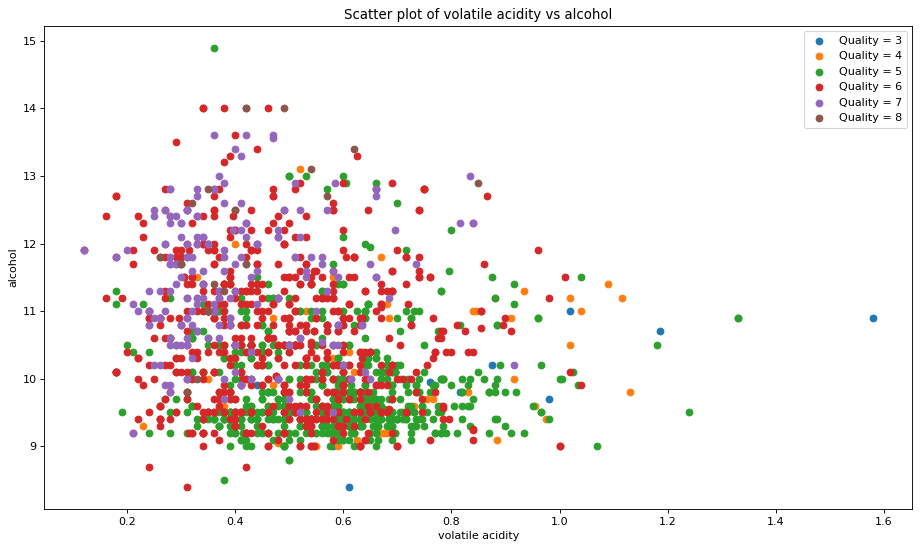

In [32]:
# Plot the scatter plot of volatile acidity and alcohol

plt.figure(figsize=(14, 8), dpi=80)

for quality in np.unique(y):
    x_by_quality = x_selected.values[y == quality]
    plt.scatter(x=x_by_quality[:, 0], 
                y=x_by_quality[:, 1],
                label="Quality = " + str(quality))

plt.legend()
plt.title('Scatter plot of volatile acidity vs alcohol')
plt.xlabel(x_selected.columns[0])
plt.ylabel(x_selected.columns[1])
plt.show()

## Application of Feature Engineering 

The models using the dataset with only the selected features, namely, volatile acidity and alcohol, are detailed below:

### Splitting into Training and Test Sets

In [33]:
x2 = x_selected

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, random_state = 0)

x2_train.head()

,volatile acidity,alcohol
140,0.745,9.6
1232,0.430,9.5
720,0.560,9.6
77,0.785,10.7
39,0.450,10.5


### Logistic Regression after Feature Engineering (Accuracy: 0.59)

#### Model Training

In [34]:
# Fit the model to the training set

logReg2 = LogisticRegression (solver = 'lbfgs', multi_class = 'auto', random_state = 0, max_iter = 8000)
# The maximum number of iterations has been raised as the default 100 iterations is insufficient 
# for model to converge given the multiple classes and features

start_time = time.time()
logReg2.fit(x2_train, y2_train)
end_time = time.time()
time_taken = end_time - start_time
print('For Logistic Regression (post-feature engineering), training the model takes %s seconds.'%time_taken)

For Logistic Regression (post-feature engineering), training the model takes 0.215423583984375 seconds.


#### Model Validation

In [35]:
# Validate the model using the test dataset
# Calculate the duration for prediction and the accuracy of the model

start_time = time.time()
y2_pred = logReg2.predict(x2_test)
end_time = time.time()
time_taken = end_time -start_time
accuracy = accuracy_score(y2_test, y2_pred)
print('For Logistic Regression (post-feature engineering), prediction takes %s seconds.'%time_taken)
print('For Logistic Regression (post-feature engineering), accuracy score: %s' %accuracy)

For Logistic Regression (post-feature engineering), prediction takes 0.001984834671020508 seconds.
For Logistic Regression (post-feature engineering), accuracy score: 0.59


#### Confusion Matrix

In [36]:
# Display the model's confusion matrix
confusion_matrix (y2_test, y2_pred)

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,  10,   3,   1,   0],
       [  0,   0, 129,  39,   1,   0],
       [  0,   0,  61,  98,  11,   0],
       [  0,   0,   3,  28,   9,   0],
       [  0,   0,   0,   4,   1,   0]], dtype=int64)

### K-NN Classification after Feature Engineering (Accuracy: 0.5775)

#### Model Training

In [37]:
# Finding k with the highest accuracy for values in k_array

k_max = 0
ac_max = 0

for k in k_array:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x2_train, y2_train)
    y2_pred = knn.predict(x2_test)
    accuracy = accuracy_score(y2_test, y2_pred)
    if (accuracy != 1) and (accuracy > ac_max):
        ac_max = accuracy
        k_max = k
    print("k:", k, " and accuracy:",accuracy)
    
print("--------------")
print("The number of neighbours with the best accuracy for K-NN is", k_max, "of accuracy", ac_max)

k: 3  and accuracy: 0.5375
k: 5  and accuracy: 0.56
k: 7  and accuracy: 0.5775
k: 9  and accuracy: 0.55
k: 11  and accuracy: 0.55
k: 13  and accuracy: 0.535
k: 15  and accuracy: 0.56
k: 17  and accuracy: 0.5575
k: 19  and accuracy: 0.575
--------------
The number of neighbours with the best accuracy for K-NN is 7 of accuracy 0.5775


In [38]:
# Model K-NN with k = 7 neighbours
knn_1 = KNeighborsClassifier(n_neighbors=k_max)

start_time = time.time()
knn_1.fit(x2_train,y2_train)
end_time = time.time()
time_taken = end_time - start_time

print("For K-NN (post-feature engineering), training the model takes %s seconds." %time_taken)

For K-NN (post-feature engineering), training the model takes 0.001981019973754883 seconds.


#### Model Validation

In [39]:
# Validate the model using the test dataset
# Calculate the duration for prediction and the accuracy of the model
start_time = time.time()
y2_pred = knn_1.predict(x2_test)
end_time = time.time()
time_taken = end_time - start_time
accuracy = accuracy_score(y2_test, y2_pred)

print("For K-NN (post-feature engineering), prediction takes %s seconds." %time_taken)
print("For K-NN (post-feature engineering), accuracy score: %s" %accuracy)

For K-NN (post-feature engineering), prediction takes 0.011965751647949219 seconds.
For K-NN (post-feature engineering), accuracy score: 0.5775


#### Confusion Matrix

In [40]:
# Display the model's confusion matrix
confusion_matrix (y2_test, y2_pred)

array([[  0,   0,   0,   2,   0,   0],
       [  0,   0,   7,   7,   0,   0],
       [  0,   0, 127,  31,  11,   0],
       [  0,   0,  60,  90,  20,   0],
       [  0,   0,   4,  22,  14,   0],
       [  0,   0,   0,   3,   2,   0]], dtype=int64)

### Decision Tree after Feature Engineering (Accuracy: 0.545)

#### Model Training

In [41]:
# Fit the model to the training set
dt = DecisionTreeClassifier(random_state = 0)

start_time = time.time()
dt.fit(x2_train, y2_train)
end_time = time.time()
time_taken = end_time - start_time

print("For Decision Tree (post-feature engineering), training the model takes %s seconds" %time_taken)

For Decision Tree (post-feature engineering), training the model takes 0.003991603851318359 seconds


#### Model Validation

In [42]:
# Validate the model using the test dataset
# Calculate the duration for prediction and the accuracy of the model
start_time = time.time()
y2_pred = dt.predict(x2_test)
end_time = time.time()
time_taken = end_time - start_time
accuracy = accuracy_score(y2_test, y2_pred)
print("For Decision Tree (post-feature engineering), prediction takes %s seconds." %time_taken)
print("For Decision Tree (post-feature engineering), accuracy score: %s" %accuracy)


For Decision Tree (post-feature engineering), prediction takes 0.0010356903076171875 seconds.
For Decision Tree (post-feature engineering), accuracy score: 0.545


#### Confusion Matrix

In [43]:
#Display the model's confusion matrix
confusion_matrix (y2_test, y2_pred)

array([[  0,   0,   1,   1,   0,   0],
       [  0,   4,   5,   4,   0,   1],
       [  1,   8, 106,  44,  10,   0],
       [  1,   6,  48,  91,  24,   0],
       [  0,   3,   5,  15,  17,   0],
       [  0,   0,   0,   2,   3,   0]], dtype=int64)

#### Visualising the Decision Tree model (after feature engineering)

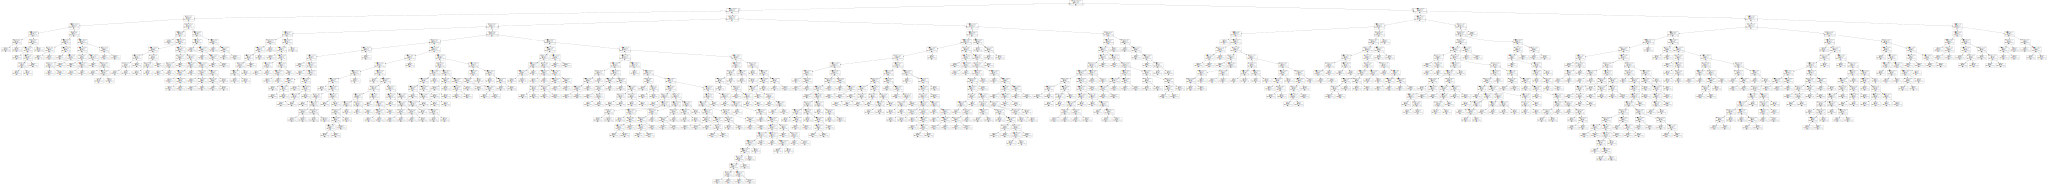

In [44]:
# Display the tree, with no output file

Source(tree.export_graphviz(dt, out_file=None, class_names=["3", "4", "5", "6", "7", "8"], 
                            feature_names= x2_train.columns))


## Impact of Feature Engineering (Feature Selection)
Feature selection has reduced the duration for model training and prediction, especially the former, as the number of features has dropped from 11 to 2. As a result of feature selection, accuracy has dropped for Logistic Regression and Decision Tree models (LogReg: from 0.625 to 0.59, DT: from 0.6275 to 0.545), but increased for K-NN model (K-NN: from 0.515 to 0.5775). 

This suggests that for this dataset, K-NN model receives the greatest benefit from feature selection out of the three models as the value of k with the best accuracy has decreased significantly from 19 to 7 as well. On the other hand, Decision Tree model has been mostly negatively impacted by feature selection, with a higher drop in accuracy and a wider spread of erroneous predictions across classes based on the confusion matrix. 

It is worth noting however, that the drop in accuracy for the Logistic Regression and Decision Tree models are not very significant (<0.1). This is in line with the fact that several features or independent variables have poor correlation with the dependent variable and thus have little impact on the results or provide low value to the learning of the models. 

As the current dataset of 1,599 samples is small, the reduction in training duration may not be significant, except for Logistic Regression model where there was a reduction of several seconds (duration varies depending on machine's processing power). However, if the size of the dataset is much bigger, the benefit of reduced training time as a result of feature selection may outweigh the cost of information loss depending on the chosen model. It is thus worth noting that further experimentation is required with different models and feature selection to determine the most appropriate learning model. 

# Final Remarks

## Conclusion

In this report, three classification models (Logistic Regression, K-NN and Decision Tree) were applied to the dataset for quality of red wine to investigate the relationship between the independent variables (11 objective attributes of wine) and dependent variable (quality). Data Engineering (data sampling) and Feature Engineering (feature selection) were also conducted to explore if better models can be built. 

The results however, were not very encouraging. Models on average attained an accuracy score around 0.5 - 0.6, with poor predictions made especially for the minority classes of grades 3, 4 and 8 based on the confusion matrix. There is low correlation between the independent variables and dependent variables, with only 2 independent variables having a Pearson correlation coefficient value of more than 0.3. Data Engineering and Feature Engineering also did not significantly enhance the performance of the models. One possible reason for this is the extremely low number of samples for minority classes - only 10 for grade 3 and 18 for grade 8.

Hence, a conclusion on the relationships between red wine attributes and its quality cannot be drawn due to the small dataset. It is uncertain whether consumer preferences can be transformed into measurable indicators for the wine production process or whether aiming for certain levels of the identified attributes (e.g. a specific alcohol level or acidity level) during the wine production process will lead to wine of high quality preferred by consumers. Though it may be argued that consumer preferences and hence wine quality graded by experts are subjective and cannot be learnt or predicted to a great extent by machines, such hypothesis cannot be tested based on the current dataset given the small size. More data, especially for the minority classes, need to be collected for better model training to achieve a more conclusive evaluation.

## Learning Points

1) From this project, we have learned that to achieve an acceptable performance for our machine learning models, large amount of data is required for all classes. Although data sampling can be adopted to mitigate part of the negative effects of an imbalanced dataset, this comes with tradeoffs and the benefits are limited by the size of the original datatset. Moreover, for our machine learning models to be able to make useful predictions, a dataset with independent variables that have a high correlation with the dependent variable is required. Thus, multiple iterations of data collection, sampling and building of the model with various arguments may be necessary to increase the precision of the model.

2) With regards to the feature engineering of the dataset, we realise that depending on the dataset, it may be possible to reduce the number of independent variables drastically while having only a marginal drop in the accuracy of our model. This is desirable not only because this helps to reduce the training time of our model, but also because it allows us to visualise the scatter plot of the independent variables (assuming we have only 2 or 3 of them after feature engineering). However, in the context of this project, the reduction in the training time is not substantial (in terms of absolute value) largely due to the size of our dataset.

3) Also, among the 3 models, Logistic Regression, K-NN and Decision Tree, there is no objective "best" model. The performance of the models largely depend on the nature of the dataset and whether additional techniques such as data sampling or feature selection have been applied to said dataset. Hence, in order to select a suitable classification model, repeated trial and error is sometimes necessary to find the best performing model for a particular dataset.